In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for lines in openFile(FileName):
        if lines != 'CloneID Familienummer':
            line = lines.split()
            if len(line[1:]) == 1:
                lib[int(line[0])] = int(line[1])
            else:
                lib[int(line[0])] = line[1:]
            
    return lib
            
lib_family = lib('..\Data\CloneIdFamily.txt')
lib_clust = lib('..\Data\kmca_results.txt')

6
7


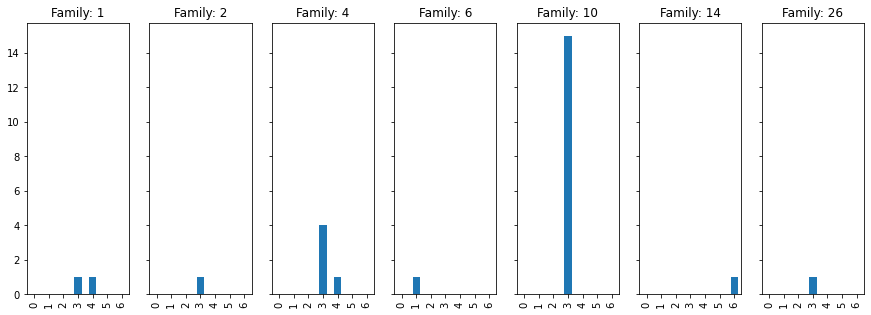

In [103]:
def making_histograms(data_fam, data_clust):
    fam_clust = {}
    nr_of_familys = max(list(data_fam.values()))
    
    highest_cluster = max(list(data_clust.values()))
    for family in range(1,nr_of_familys+1):
        clusters = []
        count = {}
        IDs = [ID  for (ID, value) in data_fam.items() if value == family]
        for ID in IDs:
            if ID in list(data_clust.keys()):
                clusters.append(data_clust[ID])
            if len(clusters)>0:
                if max(clusters) > highest_cluster:
                    highest_cluster = max(clusters)
            
            for cluster in range(highest_cluster+1):
                count[cluster] = clusters.count(cluster)
        for cluster in count.keys():
            if count[cluster]>0:
                fam_clust[family] = count
    
    print(highest_cluster)    
    
    aantal_plots = 0
    for family in list(fam_clust.keys()):
        if fam_clust[family] != {}:
            aantal_plots += 1
    print(aantal_plots)
    
    
    fig, axes = plt.subplots(ncols=aantal_plots,nrows=1, sharey=True, figsize=(15,5))
    plot=0
    for family in list(fam_clust.keys()):
        if fam_clust[family] != {}:
            ax_to_use = axes[plot]
            df = pd.DataFrame(fam_clust[family], index=list(range(len(list(fam_clust[family]))))).head(1).transpose()
            #ax_to_use.xlim(0,highest_cluster)
            df.plot(kind='bar',ax=ax_to_use, legend=False)
            ax_to_use.set_title(f'Family: {family}')
            plot += 1
    
    

making_histograms(lib_family, lib_clust)

In [89]:
a = [2,3,4]
a.count(1)

0